# Exploratory Data Analysis (using MedMNIST as an example)

This notebook walks through some best practices while exploring a data set, using the MedMNIST data set as an example. The code here depends on PyTorch and creates a Dataset object, on which all the functionality is demonstrated. This however could be easily replicated on other similar data structures (Datastores in MATLAB, ...)

In [1]:
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import medmnist
from medmnist import INFO

/home/akamath/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_per_class_histogram(data_set, n_images):
    category_names = list(train_dataset.info['label'].values())
    n_classes = np.unique(data_set.labels)
    data_hist = np.zeros(len(n_classes))
    for elem in data_set.labels:
        data_hist[elem] += 1

    data_hist /= len(data_set.labels)

    fig, ax = plt.subplots()
    plt.bar(n_classes, data_hist)
    plt.axhline(1./len(n_classes))
    plt.title("Normalized histogram of labels in data set")
    ax.set_xticks(range(len(n_classes)))
    ax.set_xticklabels(category_names, rotation = 90)

In [3]:
data_flag = 'dermamnist'
download = True
BATCH_SIZE = 128

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [4]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)

19725312it [00:02, 6961788.90it/s]                              


/home/akamath/miniconda3/lib/python3.9/site-packages/medmnist/utils.py:25: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


Dataset DermaMNIST (dermamnist)
    Number of datapoints: 7007
    Root location: /home/akamath/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY 4.0


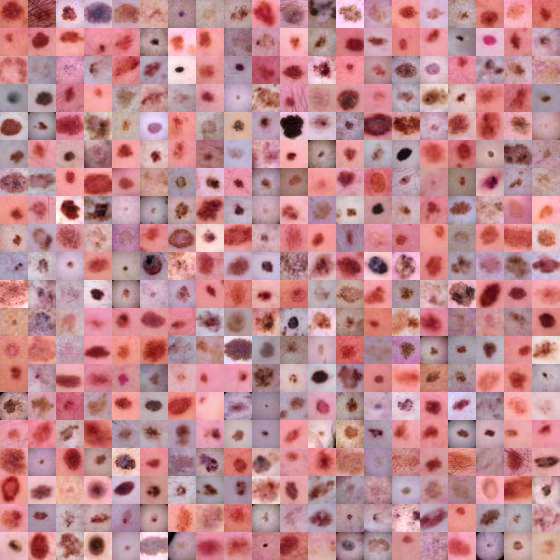

In [5]:
print(train_dataset)

train_dataset.montage(length=20)

In [6]:
type(train_dataset)

medmnist.dataset.DermaMNIST

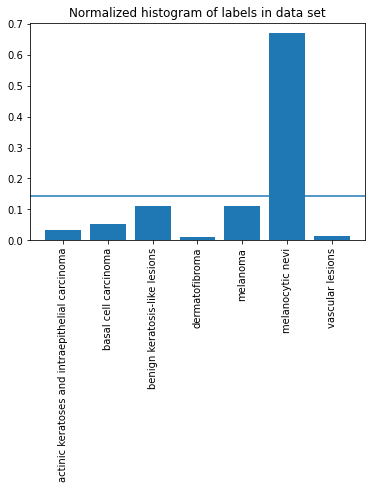

In [7]:
n_images = len(train_dataset)
plot_per_class_histogram(train_dataset, n_images)